In [119]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import math
import random

dataDir = 'c:/Users/llave/Documents/CMS/data/'

In [120]:
imgs, imgs_theta = [], []

fname_theta = "images_e_t_0p25_0.npz"
fname =  "images_e_0p25_0.npz"

imgs.append(np.load(dataDir+fname)['images'])
imgs_theta.append(np.load(dataDir+fname_theta)['images'])

imgs = np.vstack(imgs)
imgs_theta = np.vstack(imgs_theta)

In [121]:
print(imgs.shape, imgs_theta.shape)

(1084, 6401) (332, 6401)


In [122]:
mutual = []
mutual_theta = []
for img in imgs:
    for img_t in imgs_theta:
        if(img[0]==img_t[0]): 
            mutual.append(img)
            mutual_theta.append(img_t)
mutual = np.vstack(mutual)
mutual = np.reshape(mutual[:,1:],(mutual.shape[0],40,40,4))
print(mutual.shape)
mutual_theta = np.vstack(mutual_theta)
mutual_theta = np.reshape(mutual_theta[:,1:],(mutual_theta.shape[0],40,40,4))
print(mutual_theta.shape)

(73, 40, 40, 4)
(73, 40, 40, 4)


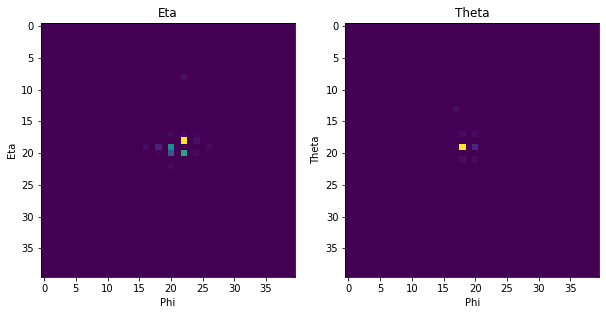

31.071605682373047
46.727996826171875


In [132]:
%matplotlib inline

event = 50

fig, axs = plt.subplots(1,2,figsize=(10,10))

axs[0].imshow(mutual[event,:,:,0])
axs[1].imshow(mutual_theta[event,:,:,0])

axs[0].set_title("Eta")
axs[1].set_title("Theta")

axs[0].set_xlabel("Phi")
axs[0].set_ylabel("Eta")
axs[1].set_xlabel("Phi")
axs[1].set_ylabel("Theta")

plt.show()

print(np.max(mutual[event,:,:,0]))
print(np.max(mutual_theta[event,:,:,0]))

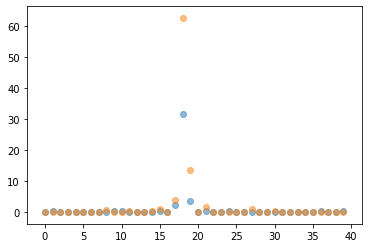

In [149]:
img = mutual[0,:,:,0]
phitot = np.sum(img,axis=0)
img = mutual_theta[0,:,:,0]
phitot2 = np.sum(img,axis=0)
plt.scatter(np.arange(40),phitot,alpha=0.5)
plt.scatter(np.arange(40),phitot2,alpha=0.5)